In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('ZipData_CLEANED.csv')

In [2]:
#remove outliers
y = df['PCTPOP65']
removed_outliers_65 = y.between(y.quantile(.05), y.quantile(.95))
df = df[df['PCTPOP65'] != removed_outliers_65]

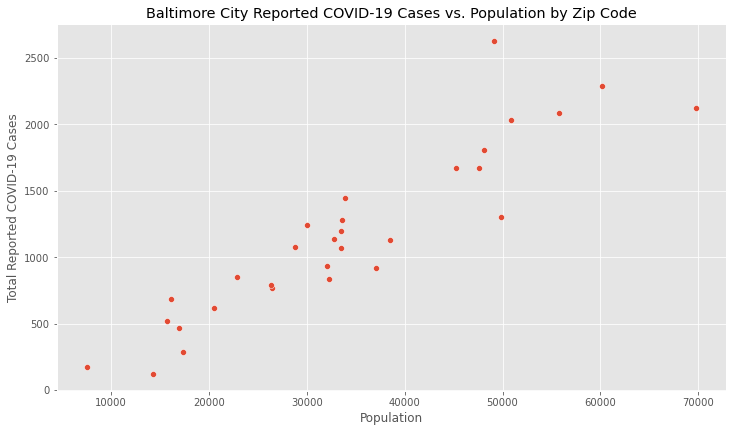

[[1.         0.91589534]
 [0.91589534 1.        ]]


In [3]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=df,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.show()
corr = np.corrcoef(df[['Pop2010','TotalCases']],rowvar=False)
print(corr)

In [4]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [5]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df['Pop2010'].to_numpy(),df['TotalCases'].to_numpy(),200)

#95% C.I. for regression line slopes
cis95 = np.percentile(bs_slope_reps,[2.5,97.5])
print(cis95)

[0.0322687  0.04923211]


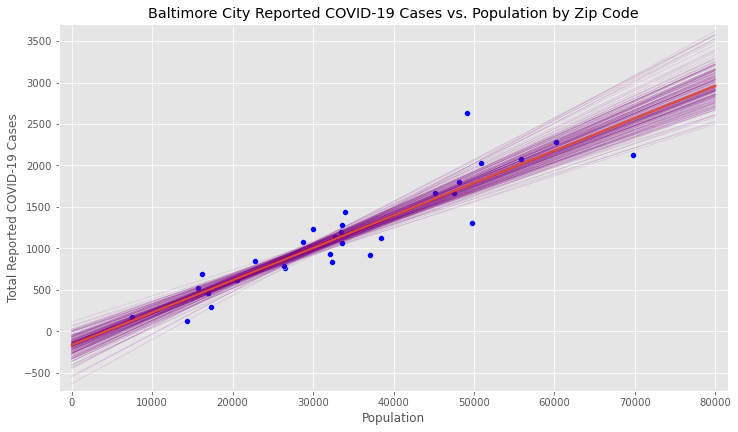

[[1.         0.91589534]
 [0.91589534 1.        ]]


In [6]:
#linear regression with 100 bootstrap lines 
a,b = np.polyfit(df['Pop2010'],df['TotalCases'],1)
x = np.array([0,80000])
y = a * x + b

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
for i in range(200):
    _ = plt.plot(x,bs_slope_reps[i]*x + bs_intercept_reps[i],
                linewidth=0.5,alpha=0.2,color='purple')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=df,legend=False,color='blue')
_ = plt.plot(x,y,linewidth=2)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.margins(.02)
plt.show()

corr = np.corrcoef(df[['Pop2010','TotalCases']],rowvar=False)
print(corr)

In [7]:
caseArray = df['TotalCases'].to_numpy()
per33 = np.percentile(caseArray,100/3)
print(per33)
per67 = np.percentile(caseArray,((100/3)*2))
print(per67)

847.0
1288.6666666666667


In [8]:
labelList = []

for index, row in df.iterrows():
    if row['TotalCases'] < per33:
        labelList.append('lowCases')
    elif row['TotalCases'] >= per33:
        if row['TotalCases'] < per67:
            labelList.append('medCases')
        elif row['TotalCases'] >= per67:
            labelList.append('highCases')
        
df['classLabel'] = labelList
print(df.head())


   Unnamed: 0  Zip Code    AREALAND  AREAWATR  Pop2010    HU100      NHW  \
0           0     21201   3340677.0       0.0  16972.0  11255.0   5482.0   
1           1     21202   4111039.0  331316.0  22832.0  10372.0   6049.0   
2           2     21205   5304530.0       0.0  16146.0   7059.0   2933.0   
3           3     21206  18667230.0    3869.0  50846.0  21762.0  13133.0   
4           4     21207  26710727.0   81229.0  48133.0  20272.0   4683.0   

       NHB   NHAI     NHA  ...  MEDAGE   VACNS  PVACNS  PHOWN  PWOMORT  PRENT  \
0   8896.0   51.0  1519.0  ...    30.3  1413.0    12.6    7.8     16.3   90.6   
1  14845.0   48.0   815.0  ...    32.3  1972.0    19.0   17.9     21.7   77.2   
2  11259.0   64.0   245.0  ...    30.6  1436.0    20.3   23.0     43.8   59.0   
3  34557.0  167.0   784.0  ...    35.4  1963.0     9.0   49.5     18.3   39.4   
4  40270.0  118.0   550.0  ...    38.7  1494.0     7.4   48.0     19.6   40.2   

   PLT18SP         MHINC  TotalCases  classLabel  
0    

In [9]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[['Pop2010','MHINC']],\
                     df['classLabel'],test_size=0.3,\
                         random_state=123,stratify=df['classLabel'])

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print('\n\nPredictions:')
print(y_pred)
score = knn.score(X_test,y_test)
print('\n\nAccuracy:')
print(score)
print('\n')



Predictions:
['highCases' 'medCases' 'lowCases' 'medCases' 'medCases' 'highCases'
 'lowCases' 'medCases' 'lowCases']


Accuracy:
0.8888888888888888


